# Demonstrations

#### In this notebook, we give some demonstrations of using the `Lie_algebras` package. This involves the following sections:
##### 1. Speedup using Pauli decomposition representation instead of full matrix representation.
##### 2. Using Choi-Jamiołkowsky to find conserved quantities.
##### 3. Example 0, recreating the Lie algebra generated by $...$.
##### 4. Example 1/2/3, constructing reduced Lie algebras from a selection of Hamiltonians and invariants.
##### For further examples, please refer to the `experiments.ipynb` file.

In [3]:
from Lie_algebras import *
import numpy as np
import pickle
import matplotlib.pyplot as plt

### 1. Speedup using Pauli decomposition for complete_algebra

In [2]:
# Easy example comparison, complete {X, I, Z}

easy = [X, I, Z]
easy_pauli = [Pauli([X]), Pauli([I]), Pauli([Z])]

%timeit complete_algebra(easy, 5)
%timeit pauli_complete_algebra(easy_pauli, 5)

503 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.54 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
# Medium example comparison, complete {X_1Y_2Z_5, Z_1Y_2Y_4Y_5, X_1X_2Y_3Z_4}

medium = [np.kron(X, np.kron(Y, np.kron(I, np.kron(I, Z)))), np.kron(Z, np.kron(Y, np.kron(I, np.kron(Y, Y)))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, I))))]
medium_pauli = [Pauli([X, Y, I, I, Z]), Pauli([Z, Y, I, Y, Y]), Pauli([X, X, Y, Z, I])]

%timeit complete_algebra(medium, 10)
%timeit pauli_complete_algebra(medium_pauli, 10)

8.16 ms ± 768 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.8 ms ± 640 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
# Hard example comparison

q, r, s, t = Pauli([X, Y, Z, I, Z]), Pauli([Z, Z, I, Y, Y]), Pauli([X, X, Y, Z, I]), Pauli([X, Y, Z, I, I])
ql, rl, sl, tl = np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, Z)))), np.kron(Z, np.kron(Z, np.kron(I, np.kron(Y, Y)))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, I)))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, I))))

hard = [ql + rl, 2*ql + sl + 5*tl, 3*rl + sl - 2*tl]
hard_pauli = [q + r, 2*q + s + 5*t, 3*r + s - 2*t]

print("For 5 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

q, r, s, t = Pauli([X, Y, Z, I, Z, Y]), Pauli([Z, Z, I, Y, Y, Z]), Pauli([X, X, Y, Z, I, Z]), Pauli([X, Y, Z, I, I, Y])
ql, rl, sl, tl = np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, Y))))), np.kron(Z, np.kron(Z, np.kron(I, np.kron(Y, np.kron(Y, Z))))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, Z))))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(I, Y)))))

hard = [ql + rl, 2*ql + sl + 5*tl, 3*rl + sl - 2*tl]
hard_pauli = [q + r, 2*q + s + 5*t, 3*r + s - 2*t]

print("For 6 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

q, r, s, t = Pauli([Y, Z, I, Z, Y, Y, X]), Pauli([Z, I, Y, Y, Z, I, Y]), Pauli([X, Y, Z, I, Z, X, Z]), Pauli([Y, Z, I, I, Y, Z, I])
ql, rl, sl, tl = np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(Y, np.kron(Y, X)))))), np.kron(Z, np.kron(I, np.kron(Y, np.kron(Y, np.kron(Z, np.kron(I, Y)))))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(X, Z)))))), np.kron(Y, np.kron(Z, np.kron(I, np.kron(I, np.kron(Y, np.kron(Z, I))))))

hard = [ql + rl, 2*ql + sl, 3*rl + sl - tl]
hard_pauli = [q + r, 2*q + s, 3*r + s - t]

print("For 7 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

q, r, s, t = Pauli([X, Y, Z, I, Z, Y, Y, X]), Pauli([Z, Z, I, Y, Y, Z, I, Y]), Pauli([X, X, Y, Z, I, Z, X, Z]), Pauli([X, Y, Z, I, I, Y, Z, I])
ql, rl, sl, tl = np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(Y, np.kron(Y, X))))))), np.kron(Z, np.kron(Z, np.kron(I, np.kron(Y, np.kron(Y, np.kron(Z, np.kron(I, Y))))))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(X, Z))))))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(I, np.kron(Y, np.kron(Z, I)))))))

hard = [ql + rl, 2*ql + sl, 3*rl + sl - tl]
hard_pauli = [q + r, 2*q + s, 3*r + s - t]

print("For 8 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

q, r, s, t = Pauli([X, Y, Z, I, Z, Y, Y, X, I]), Pauli([Z, Z, I, Y, Y, Z, I, Y, X]), Pauli([X, X, Y, Z, I, Z, X, Z, X]), Pauli([X, Y, Z, I, I, Y, Z, I, Z])
ql, rl, sl, tl = np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(Y, np.kron(Y, np.kron(X, I)))))))), np.kron(Z, np.kron(Z, np.kron(I, np.kron(Y, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Y, X)))))))), np.kron(X, np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(Z, np.kron(X, np.kron(Z, X)))))))), np.kron(X, np.kron(Y, np.kron(Z, np.kron(I, np.kron(I, np.kron(Y, np.kron(Z, np.kron(I, Z))))))))

hard = [ql + rl, 2*ql + sl, 3*rl + sl - tl]
hard_pauli = [q + r, 2*q + s, 3*r + s - t]

print("For 9 qubits:")
%timeit complete_algebra(hard, 15)
%timeit pauli_complete_algebra(hard_pauli, 15)

For 5 qubits:
12.4 ms ± 808 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
41 ms ± 7.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
For 6 qubits:
158 ms ± 6.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
80.2 ms ± 850 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
For 7 qubits:
343 ms ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
77.1 ms ± 6.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
For 8 qubits:
1.37 s ± 76.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
133 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
For 9 qubits:
6.31 s ± 698 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
119 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
# Super hard for fun

q, r, s, t, u = Pauli([X, Y, Z, I, Z, Y, Y, X, X, I]), Pauli([Z, Z, I, Y, Y, Z, I, Y, I, Y]), Pauli([X, X, Y, Z, I, Z, X, Z, Y, Z]), Pauli([I, Y, Z, I, X, X, Z, I, Z, Z]), Pauli([I, Y, Y, I, X, Y, Z, I, I, X])

hard_pauli = [q + r + s, 2*q + s - 1j*u, 3*r + s - t]

%timeit pauli_complete_algebra(hard_pauli, 20)

1.23 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


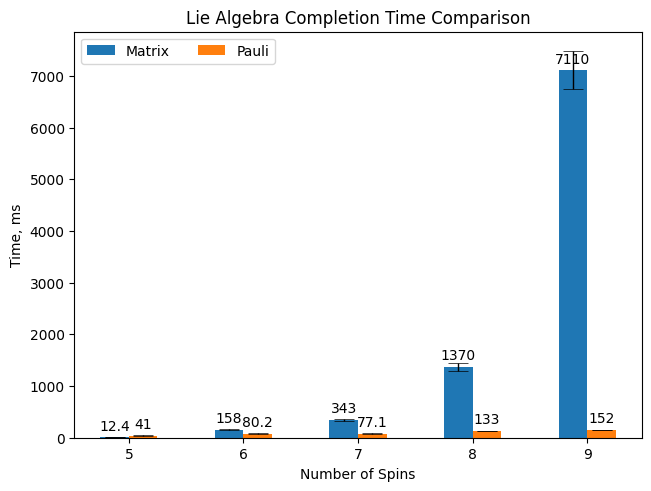

In [89]:
# Plotting

spins = ("5", "6", "7", "8", "9")
representation = {
    'Matrix': (12.4, 158, 343, 1370, 7110, 0.808, 6.61, 25.4, 76.1, 370),
    'Pauli': (41, 80.2, 77.1, 133, 152, 7.31, 6.61, 6.95, 3.6, 5.19),
}

x = np.arange(len(spins))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in representation.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement[0:5], width, label=attribute)
    ax.bar_label(rects, padding=3)
    ax.errorbar(x + offset, measurement[0:5], yerr=measurement[5:10], fmt='None', color='0.6', ecolor='black', elinewidth=1, capsize=7, capthick=0.5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time, ms')
ax.set_xlabel('Number of Spins')
ax.set_title('Lie Algebra Completion Time Comparison')
ax.set_xticks(x + 0.5*width, spins)
ax.legend(loc='upper left', ncols=2)

plt.show()

### 2. Using Choi-Jamiołkowsky in a system of $n$ spins.

##### To demonstrate the use of Choi-Jamiołkowsky to find conserved quantities, we work with random matrices in a system of $n$ spins and check that the commutation holds.

In [9]:
# Given an mxm matrix A, we find a matrix B such that [A, B] = 0 using Choi-Jamiołkowsky isomorphism.

def find_comm(m):
    # Random mxm matrix
    Re = np.random.randn(m, m)
    Im = np.random.randn(m, m)
    A = Re + 1.j * Im

    # Find eigenvectors of A tensor A^-T with eigenvalue 1 (some error when finding evals=1 so -1 and allow 1e-6 error about 0)
    L = np.kron(A, np.linalg.inv(A).T)
    l, V = np.linalg.eig(L)
    l -= 1
    l = l.real**2 + l.imag**2
    ii = (l<1e-6)
    v = V[:, ii]

    # Construct B by reshape eigenvectors
    for vec in v.T:
        B = vec.reshape(m, m)
        # Raise error if AB-BA is not 0
        C = commutator(B, A)
        assert np.allclose(C, 0)

    # Return the number of Bs found

    return v.shape[1]

In [8]:
# Check procedure works for matrices of size 1 to 25

print([find_comm(i) for i in range(1, 26)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


##### REMARK: As demonstrated above, since no errors were raised, conserved quantities were indeed found successfully. In addition we have shown that for an $m\times m$ matrix, there exist $m$ such conserved quantities.

### 3. Full Lie algebraic construction for the set $\Bigl\{\{Z_j\}_{j=1}^n, \{X_jX_{j+1}\}_{j=1}^{n-1}, X_1, X_n\Bigr\}$

##### In this section we use the Lie-algebras package to reproduce previously found Lie algebras.

In [26]:
# time for various n

for n in [3, 4, 5, 6, 7]:
    g1_ops = []
    for i in range(0, n):
        g1_ops.append(z_tensor(n, [i]))
    for i in range(0, n-1):
        g1_ops.append(x_tensor(n, [i, (i+1)%n]))
    g1_ops.append(x_tensor(n, [0]))
    g1_ops.append(x_tensor(n, [n-1]))
    com = pauli_complete_algebra(g1_ops, 250)
    print(f"For n={n}:")
    print(f"Expect 2n^2+3n+1={2*n**2+3*n+1}, got {len(com)}.")

For n=3:
Expect 2n^2+3n+1=28, got 28.
For n=4:
Expect 2n^2+3n+1=45, got 45.
For n=5:
Expect 2n^2+3n+1=66, got 66.
For n=6:
Expect 2n^2+3n+1=91, got 91.
For n=7:
Expect 2n^2+3n+1=120, got 120.


##### REMARK: We have shown above that the produced Lie algebras are indeed the correct size. It can additionally be shown that the Lie algebras produced are equivalent to those found previously.

### 4. Detailed examples of using reduced Lie algebraic formulation.

##### - Generating reduced Lie algebras for $H:\Bigl\{\sum_{j=1}^n Z_j, \sum_{j=1}^{n} X_jX_{j+1}\Bigr\}$ and $I_k: \Bigl\{Z_1Z_k\Bigr\}$. Examples given for $k=n, \lfloor n/2\rfloor$.

In [27]:
# contruct H for n = 3, 4, ..., 7

H =[]
for n in range(3, 8):
    # op1 = Z_1+...+Z_n, op2 = X_1X_2+...+X_nX_1
    ops1, ops2 = [], []
    for i in range(n):
        new_op = [I for i in range(n)]
        new_op[i] = Z
        ops1.append(new_op)
    for i in range(n):
        new_op = [I for i in range(n)]
        new_op[i] = X
        new_op[(i+1)%n] = X
        ops2.append(new_op)
    op1 = Pauli(ops1[0])
    op2 = Pauli(ops2[0])
    for j in range(1, len(ops1)):
        op1 += Pauli(ops1[j])
    for j in range(1, len(ops2)):
        op2 += Pauli(ops2[j])
    H.append((op1, op2))

In [29]:
# Reduced Lie algebra with Inv = Z_1Z_n

Inv = []
for n in range(3, 7):
    ops3 = [I for i in range(n)]
    ops3[0], ops3[n-1] = Z, Z
    op3 = Pauli(ops3)
    Inv.append(op3)

print("Invariant = Z_1Z_n: (n:length)")
for n in range(3, 7):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3]
    alg = pauli_make_algebra([op3], [op1, op2], 500)
    print(f"n={n}: {len(alg)}")

Invariant = Z_1Z_n: (n:length)
n=3: 15
n=4: 22
n=5: 111
n=6: 225


In [ ]:
filtering(alg, 2)

In [ ]:
# Comparison to Lie algebraic approach with Inv = Z_1Z_n

Inv = []
for n in range(3, 8):
    ops3 = [I for i in range(n)]
    ops3[0], ops3[n-1] = Z, Z
    op3 = Pauli(ops3)
    Inv.append(op3)

print("The full algebra: (n:length)")
for n in range(3, 7):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3]
    alg = pauli_complete_algebra([op3, op1, op2], 500)
    print(f"n={n}: {len(alg)}")

In [30]:
# Reduced Lie algebra with Inv = Z_1Z_{n/2}

Inv = []
for n in range(3, 7):
    ops3 = [I for i in range(n)]
    ops3[0], ops3[int(n/2)] = Z, Z
    op3 = Pauli(ops3)
    Inv.append(op3)

print("Invariant = Z_1Z_{n/2}: (n:length)")
for n in range(3, 7):
    op1 = H[n-3][0]
    op2 = H[n-3][1]
    op3 = Inv[n-3]
    alg = pauli_make_algebra([op3], [op1, op2], 500)
    print(f"n={n}: {len(alg)}")

Invariant = Z_1Z_{n/2}: (n:length)
n=3: 15
n=4: 16
n=5: 111
n=6: 139


##### REMARK: We have shown the scaling of the proposed Hamiltonian and invariant, as well as their 2 body interactions. In addition, we showed that the reduced Lie algebra offers an advantage to the full Lie algebraic procedure in the case $k=n$.

##### - Size of generated sets for $H:\Bigl\{\{Z_j\}_{j=1}^n, \{X_jX_{j+1}\}_{j=1}^{n}\Bigr\}$ and $I_k: \Bigl\{Z_1Z_k\Bigr\}$. For time and space convenience, these were generated in the experiments folder and pickled to the set_1 files, which can be imported for explicit analysis as shown below.

In [3]:
# Import relevant examples

file = open('set_1_periodic', 'rb')
set_1_periodic_dict = pickle.load(file)
file.close()

In [10]:
# Find sizes of each (n, k)

keys = set_1_periodic_dict.keys()
print([f"{key}: {len(set_1_periodic_dict[key])}" for key in keys])

['n3k1: 30', 'n4k1: 70', 'n4k2: 70', 'n4k3: 70', 'n5k1: 420', 'n5k2: 420', 'n6k1: 990', 'n7k1: 2002']


In [9]:
# 2-body interactions example: see all Z_1Z_j are in set

filtering(set_1_periodic_dict['n4k1'], 2)

[(1, Pauli([Z, Z, I, I])),
 ((-0-8j), Pauli([Y, I, X, I])),
 ((-0-8j), Pauli([I, Y, I, X])),
 ((16+0j), Pauli([X, I, X, I])),
 ((-16-0j), Pauli([Y, I, Y, I])),
 ((16+0j), Pauli([Z, I, Z, I])),
 ((16+0j), Pauli([I, X, I, X])),
 ((-16-0j), Pauli([I, Y, I, Y])),
 ((16+0j), Pauli([I, Z, I, Z])),
 (-32j, Pauli([X, I, Y, I])),
 (-32j, Pauli([I, X, I, Y])),
 ((64+0j), Pauli([I, Z, Z, I])),
 ((64+0j), Pauli([Z, I, I, Z])),
 ((256+0j), Pauli([I, I, Z, Z]))]

##### REMARK: We observe the all desired long range interactions are present, while the scaling is unfavourable.

##### - Generating sets for compromised long range interactions (explcit Hamiltonian and invariant sets given in the final paper). We present here the maximum range of interaction $k=2, 3$.

###### $H: \{X_{2k-1}X_{2k}, Z_k\}$, $I = \{Z_kZ_{k+1}\}$

In [31]:
# Define Hamiltonian and invariant ops for k=2

hops = []
iops = []

for n in range(3, 10):
    ops1, ops2, ops3 = [], [], []

    for i in range(0, n-1, 2):
        new_op1 = [I for j in range(n)]
        new_op1[i], new_op1[i+1] = X, X
        ops1.append(SuperPauli([(1, Pauli(new_op1))]))

    for i in range(n):
        new_op2 = [I for j in range(n)]
        new_op2[i] = Z
        ops2.append(SuperPauli([(1, Pauli(new_op2))]))

    for i in range(n-1):
        new_op3 = [I for j in range(n)]
        new_op3[i], new_op3[i+1] = Z, Z
        ops3.append(SuperPauli([(1, Pauli(new_op3))]))

    hops.append(ops1 + ops2)
    iops.append(ops3)

In [36]:
# Check scaling for k=2

for n in range(3, 10):
    alg = pauli_make_algebra(iops[n-3], hops[n-3], 500)
    print(f"n={n}: {len(alg)}")

n=3: 7
n=4: 38
n=5: 44
n=6: 75
n=7: 81
n=8: 112
n=9: 118


In [47]:
# Verify explicit scaling for k=2

scaling = []
for n in range(3, 10):
    if n % 2 == 0:
        scaling.append(int(37*(n/2)-36))
    else:
        scaling.append(int(37*(n//2)-30))

print(scaling)

[7, 38, 44, 75, 81, 112, 118]


In [37]:
# Verify long range interactions

filtering(alg, 2)

[(1, Pauli([Z, Z, I, I, I, I, I, I, I])),
 (1, Pauli([I, Z, Z, I, I, I, I, I, I])),
 (1, Pauli([I, I, Z, Z, I, I, I, I, I])),
 (1, Pauli([I, I, I, Z, Z, I, I, I, I])),
 (1, Pauli([I, I, I, I, Z, Z, I, I, I])),
 (1, Pauli([I, I, I, I, I, Z, Z, I, I])),
 (1, Pauli([I, I, I, I, I, I, Z, Z, I])),
 (1, Pauli([I, I, I, I, I, I, I, Z, Z])),
 ((16+0j), Pauli([Z, I, Z, I, I, I, I, I, I])),
 ((16+0j), Pauli([I, Z, I, Z, I, I, I, I, I])),
 ((16+0j), Pauli([I, I, Z, I, Z, I, I, I, I])),
 ((16+0j), Pauli([I, I, I, Z, I, Z, I, I, I])),
 ((16+0j), Pauli([I, I, I, I, Z, I, Z, I, I])),
 ((16+0j), Pauli([I, I, I, I, I, Z, I, Z, I])),
 ((16+0j), Pauli([I, I, I, I, I, I, Z, I, Z])),
 ((256+0j), Pauli([Z, I, I, Z, I, I, I, I, I])),
 ((256+0j), Pauli([I, I, Z, I, I, Z, I, I, I])),
 ((256+0j), Pauli([I, I, I, I, Z, I, I, Z, I]))]

###### $H: \{X_{3k-2}X_{3k-1}, X_{3k-1}X_{3k}, Z_k\}$, $I = \{Z_kZ_{k+1}\}$

In [38]:
# Define Hamiltonian and invariant ops for k=3

hops = []
iops = []

for n in range(3, 10):
    ops1, ops2, ops3 = [], [], []

    for i in range(0, n-2, 3):
        new_op1 = [I for j in range(n)]
        new_op1[i], new_op1[i+1] = X, X
        ops1.append(SuperPauli([(1, Pauli(new_op1))]))
        new_op1 = [I for j in range(n)]
        new_op1[i+1], new_op1[i+2] = X, X
        ops1.append(SuperPauli([(1, Pauli(new_op1))]))
    if n%3 == 2:
        new_op1 = [I for j in range(n)]
        new_op1[n-2], new_op1[n-1] = X, X
        ops1.append(SuperPauli([(1, Pauli(new_op1))]))

    for i in range(n):
        new_op2 = [I for j in range(n)]
        new_op2[i] = Z
        ops2.append(SuperPauli([(1, Pauli(new_op2))]))

    for i in range(n-1):
        new_op3 = [I for j in range(n)]
        new_op3[i], new_op3[i+1] = Z, Z
        ops3.append(SuperPauli([(1, Pauli(new_op3))]))

    hops.append(ops1 + ops2)
    iops.append(ops3)

In [43]:
# Check scaling for k=3

for n in range(3, 10):
    alg = pauli_make_algebra(iops[n-3], hops[n-3], 500)
    print(f"n={n}: {len(alg)}")

n=3: 15
n=4: 30
n=5: 106
n=6: 255
n=7: 270
n=8: 346
n=9: 495


In [49]:
# Verify explicit scaling for k=3

scaling = []
for n in range(3, 10):
    if n % 3 == 0:
        scaling.append(int(240*(n/3)-225))
    elif n % 3 == 1:
        scaling.append(int(240*(n//3)-210))
    else:
        scaling.append(int(240*(n//3)-134))

print(scaling)

[15, 30, 106, 255, 270, 346, 495]


In [44]:
# Verify long range interactions

filtering(alg, 2)

[(1, Pauli([Z, Z, I, I, I, I, I, I, I])),
 (1, Pauli([I, Z, Z, I, I, I, I, I, I])),
 (1, Pauli([I, I, Z, Z, I, I, I, I, I])),
 (1, Pauli([I, I, I, Z, Z, I, I, I, I])),
 (1, Pauli([I, I, I, I, Z, Z, I, I, I])),
 (1, Pauli([I, I, I, I, I, Z, Z, I, I])),
 (1, Pauli([I, I, I, I, I, I, Z, Z, I])),
 (1, Pauli([I, I, I, I, I, I, I, Z, Z])),
 ((-0-8j), Pauli([Y, I, X, I, I, I, I, I, I])),
 ((-0-8j), Pauli([X, I, Y, I, I, I, I, I, I])),
 ((-0-8j), Pauli([I, I, I, Y, I, X, I, I, I])),
 ((-0-8j), Pauli([I, I, I, X, I, Y, I, I, I])),
 ((-0-8j), Pauli([I, I, I, I, I, I, Y, I, X])),
 ((-0-8j), Pauli([I, I, I, I, I, I, X, I, Y])),
 ((16+0j), Pauli([X, I, X, I, I, I, I, I, I])),
 ((-16-0j), Pauli([Y, I, Y, I, I, I, I, I, I])),
 ((16+0j), Pauli([Z, I, Z, I, I, I, I, I, I])),
 ((16+0j), Pauli([I, Z, I, Z, I, I, I, I, I])),
 ((16+0j), Pauli([I, I, Z, I, Z, I, I, I, I])),
 ((16+0j), Pauli([I, I, I, X, I, X, I, I, I])),
 ((-16-0j), Pauli([I, I, I, Y, I, Y, I, I, I])),
 ((16+0j), Pauli([I, I, I, Z, I, Z, I,

##### REMARK: We have shown in the above, that the desired, limited long range interactions are constructed, as well as the favourable linear scaling.